<a href="https://colab.research.google.com/github/sg758253/sg1205/blob/main/ADVDS/project6/fetal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetal Health Classification
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were classified by three expert obstetricians into 3 classes:
1. Normal
2. Suspect
3. Pathological

In [92]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



In [93]:
# import csv file
df= pd.read_csv('https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project6/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Task 3) Clean the dataset by handling missing data values, scaling, encoding, etc., as necessary.

In [94]:
#info the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [95]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [96]:
# describe data
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Dataset doesn't contain any null values. so no need to clean dataset. and data tyoe of all columns are float only.

Task 1) Perform a preliminary analysis on the dataset to determine which attributes have the highest correlation with the target variable. Use graphs to visualize the results.

In [97]:
# as fetal_health is target class
corr_matrix=df.corr()
corr_matrix["fetal_health"].sort_values(ascending=True)

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

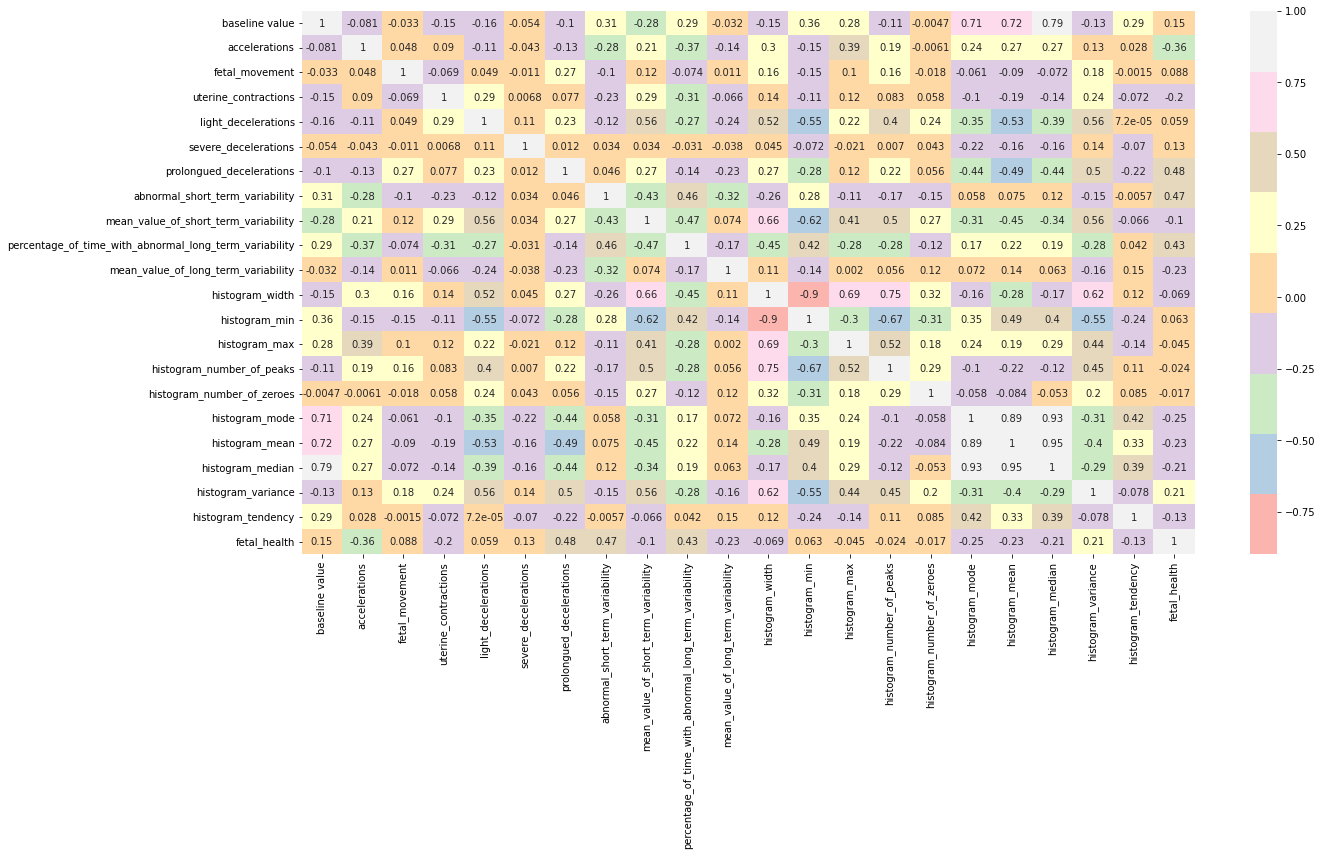

In [98]:
#corelation with pearson method
corr = df.corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='Pastel1')

As per Corarelation matrix, prolongued_decelerations class has strongest corelation with target class fetal_health. this is around 48%. Class abnormal_short_term_variability and class percentage_of_time_with_abnormal_long_term_variability also has positive corelation with target class repectively 47 and 42%.

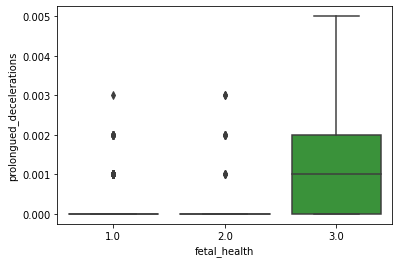

In [99]:
# prolongued_decelerations
ax1 = sns.boxplot(x='fetal_health', y='prolongued_decelerations' , data=df) 

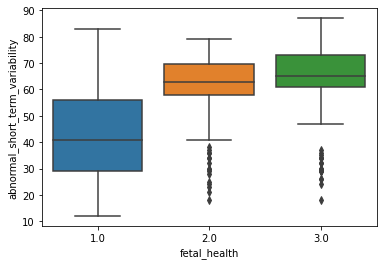

In [100]:
# abnormal_short_term_variability
ax2= sns.boxplot(x='fetal_health',y='abnormal_short_term_variability' , data=df)

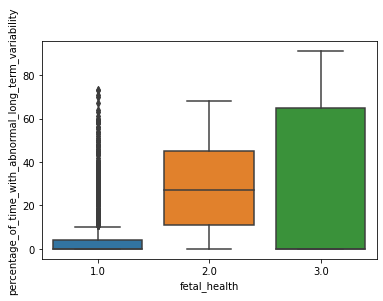

In [101]:
# percentage_of_time_with_abnormal_long_term_variability
ax3 = sns.boxplot(x='fetal_health',y='percentage_of_time_with_abnormal_long_term_variability',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc02357aa50>,
      dtype=object)

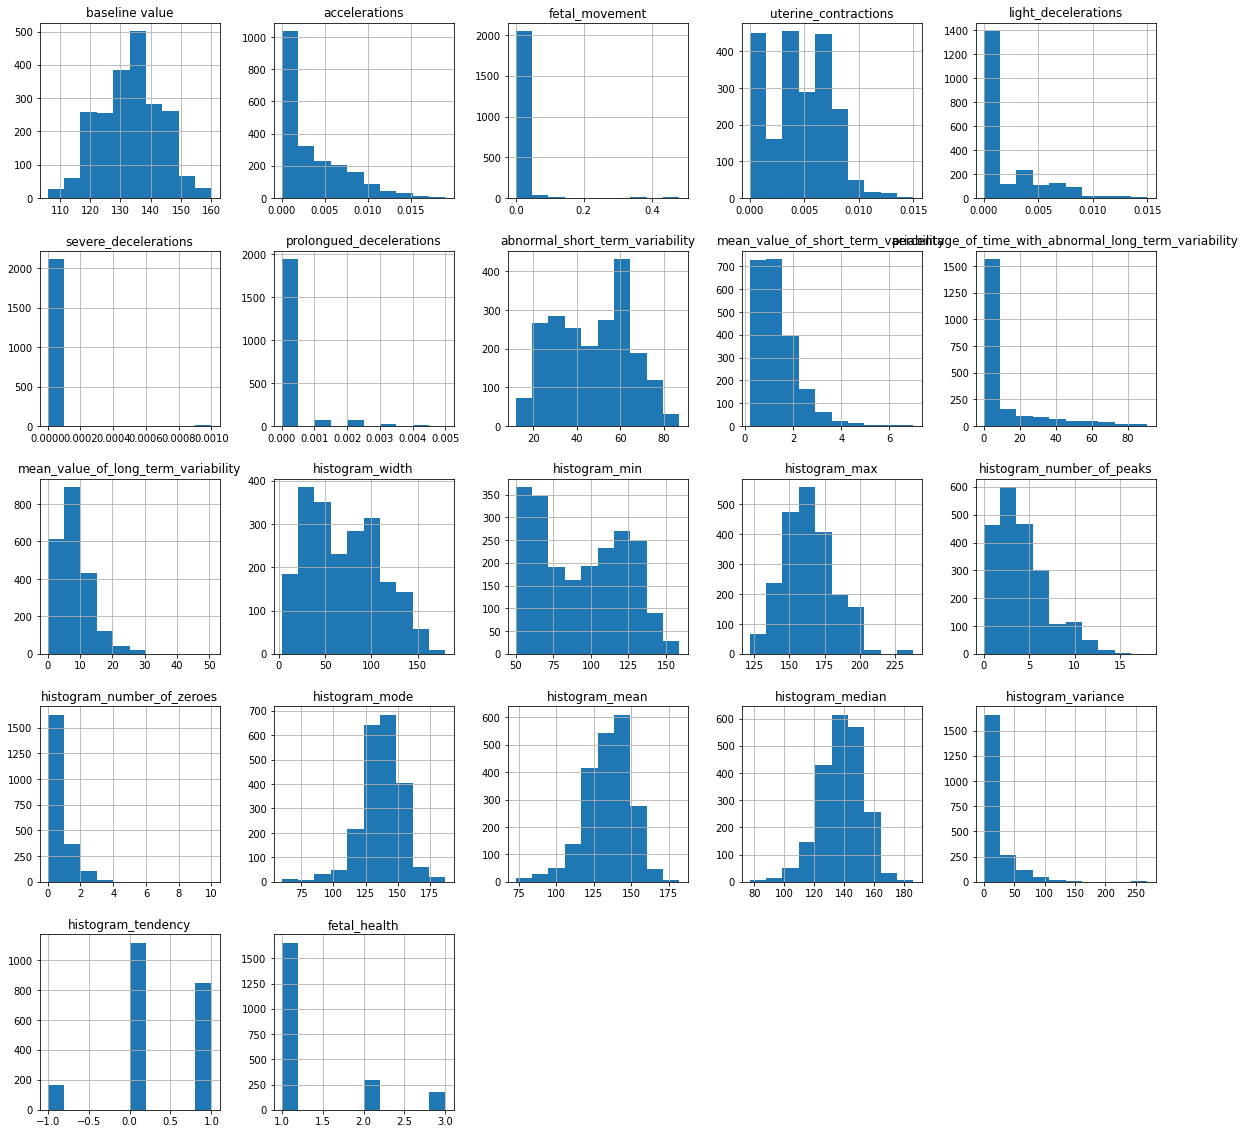

In [102]:
#plotting histogram
df.hist(figsize=(20, 20))

Some classes in dataset are not in normalization form. they have skewed curve.

In [103]:
# divinding dataset into target(Y) and features(X)

X= df.drop(['fetal_health'], axis=1) #features
Y = df['fetal_health'] #target

In [104]:
# scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX= pd.DataFrame(scaler.transform(X), columns=X.columns )

scaledX.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [105]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [106]:
# splitting the scaled data into training and testing sets (80%-20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaledX, Y_encoded, test_size=0.2, random_state=22)

In [107]:
#creating sequential model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten

model = keras.models.Sequential([keras.layers.Flatten(input_shape=[X_train.shape[1],]),keras.layers.Dense(50, activation="relu"), keras.layers.Dense(3, activation="softmax")])

In [108]:
#model architecture
model.summary()

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_109 (Flatten)       (None, 21)                0         
                                                                 
 dense_410 (Dense)           (None, 50)                1100      
                                                                 
 dense_411 (Dense)           (None, 3)                 153       
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Compiling and evaluting model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),verbose=0)
test = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9085


In [110]:
# prediction and a classification report from the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Y_pred = np.argmax(model.predict(X_test), axis=-1)
print(confusion_matrix(y_test, Y_pred))

[[325  11   1]
 [ 19  36   1]
 [  2   5  26]]


In [111]:
# print various classification performance measures
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       337
           1       0.69      0.64      0.67        56
           2       0.93      0.79      0.85        33

    accuracy                           0.91       426
   macro avg       0.85      0.80      0.82       426
weighted avg       0.91      0.91      0.91       426



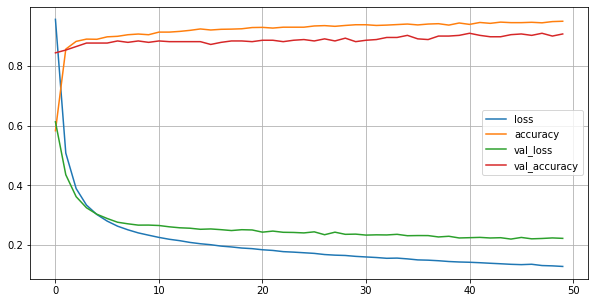

In [112]:
from sklearn.metrics import classification_report, accuracy_score

# plot model accuracy and loss during training
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.show()

Task 7) Cross-validate the NN model, and calculate the mean accuracy of the folds.

In [113]:
# import library
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [114]:

# function to create the sequential NN model
def model_baseline():
    # train a network with one hidden layer (50 nodes) and three output nodes
    model = keras.models.Sequential([keras.layers.Flatten(input_shape=[X_train.shape[1],]),keras.layers.Dense(50, activation="relu"), keras.layers.Dense(3, activation="softmax")])
    # Compile the model using appropriate parameters
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# evaluating model
estimator = KerasClassifier(build_fn=model_baseline, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX, Y_encoded, cv=kfold)

print("Mean: %.2f  std: %.2f" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # This is added back by InteractiveShellApp.init_path()


Mean: 92.24  std: 0.35


Task 8)Experiment with # hidden layers, # nodes / hidden layer, batch size, etc. to see which combinations produce a better accuracy. You may use grid search, if you wish.

In [115]:
# cross validation with multiple hidden layers 

def model_baseline():
    # train a network with 4 hidden layer (50 nodes) and three output node
    model = keras.models.Sequential([
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(3, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
    return model

# evaluating model
estimator = KerasClassifier(build_fn=model_baseline, epochs=150, verbose=0)

# 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX,Y_encoded, cv=kfold)

print("Mean: %.2f  std: %.2f" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Mean: 92.76  std: 0.66


In [116]:
# cross validation with more number of nodes

def model_baseline():
    model = keras.models.Sequential([
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    keras.layers.Dense(200, activation="relu"),
                                    keras.layers.Dense(3, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
    return model

# evaluating model
estimator = KerasClassifier(build_fn=model_baseline, epochs=150, verbose=0)

# 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX,Y_encoded, cv=kfold)

print("Mean: %.2f  std: %.2f " % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


Mean: 91.96  std: 0.90 


In [117]:
 #cross validation with multiple layers and different number of nodes

def multi_node_multi_layer():
    model = keras.models.Sequential([
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    keras.layers.Dense(100, activation="relu"),
                                    keras.layers.Dense(70, activation="relu"),
                                    keras.layers.Dense(65, activation="relu"),
                                    keras.layers.Dense(20, activation="relu"),
                                    keras.layers.Dense(3, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# evaluating model 
nodes_layers_estimator = KerasClassifier(build_fn=multi_node_multi_layer, epochs=150, verbose=0)

# 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX, Y_encoded, cv=kfold)

print("Mean: %.2f  std: %.2f " % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Mean: 92.24  std: 0.39 


In [118]:
 #cross validation with different batch size

def model_baseline():
    model = keras.models.Sequential([
                                    keras.layers.Flatten(input_shape=[X_train.shape[1],]),
                                    keras.layers.Dense(50, activation="relu"),
                                    keras.layers.Dense(3, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# evaluating model
estimator = KerasClassifier(build_fn=model_baseline, epochs=150, batch_size=128, verbose=0)

# 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaledX, Y_encoded, cv=kfold)

print("Mean: %.2f  std: %.2f " % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Mean: 90.78  std: 1.44 


In [119]:
from sklearn.model_selection import GridSearchCV

# define the grid search parameters
epochs = [10, 60, 150, 200]
# params dict
param_grid = dict(epochs=epochs)
kfold = StratifiedKFold(n_splits=3, shuffle=True)

#fit the model
grid = GridSearchCV(estimator=nodes_layers_estimator, param_grid=param_grid, n_jobs=1, cv=kfold)
grid_result = grid.fit(scaledX,Y_encoded)

print("Best score is %f with %s" % (grid_result.best_score_*100, grid_result.best_params_))

Best score is 92.661742 with {'epochs': 150}


**Summary:**

1. Corarelation matrix: prolongued_decelerations class has strongest corelation with target class fetal_health. this is around 48%. Class abnormal_short_term_variability and class percentage_of_time_with_abnormal_long_term_variability also has positive corelation with target class repectively 47 and 42%.

2. Sequential Neural Network: The cross-validated mean accuracy of the SNN for multiclass classification was 91percent, with a range of 90-92 percent. This sequential model performed well, especially for the normal and pathological classes, despite the uneven distributions of the dataset.

3. Results: The accuracy of grid search on epoch was 92%.